In [2]:
# import all nesscary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [4]:
# load datasets in jupyter enviroment
data = np.loadtxt("student admission dataset.txt", delimiter=",")

#transform data into pandas dataframe
df_data = pd.DataFrame(data = data,columns=["Exam score 1","Exam score 2","Admission (1 or 0)"])
df_data.head()

,Exam score 1,Exam score 2,Admission (1 or 0)
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


In [5]:
# seperate features and labels from dataset
X = data[:,[0,1]]
Y = data[:,-1]

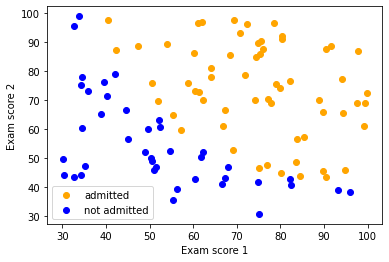

In [6]:
# let's make sperate list of admitted and not admitted student  for ploting
pos = []
neg = []
    
for i,j in enumerate(Y):
    if j == 1:
        pos.append(i)
    else:
        neg.append(i)
            
fig = plt.subplot()

# plot exam1 and exam2 score of admitted student 
plt.scatter(x = X[pos,0], y = X[pos,1], c="orange", label="admitted")
# plot exam1 and exam2 score of not admitted student 
plt.scatter(x = X[neg,0], y = X[neg,1], c="blue", label="not admitted")

# label x-axis and y-axis 
plt.xlabel("Exam score 1")
plt.ylabel("Exam score 2")

plt.legend()
plt.show()

In [7]:
# sigmoid function transform contineous value into probability of (1 or 0)
def sigmoid(z):
    
    h_z = (1 / (1 + np.exp(-z)))

    return h_z

In [8]:
# calculating cost of overall traning
def cost_function(theta_,X_,y):
    
    m = len(y) # m ----> scalar num representing length of labels
    J = 0 # 
    
    # calculating y_hat of all tranning example
    h_z = X_ @ theta_
    
    h_z = sigmoid(h_z)

    # we can also combine into single function
    # J = (-1/m) * np.sum(np.multiple((y,np.log(h_Z))) + np.multiple((1-y,np.log(1-h_Z11))))
    
    # first part of cost function
    y_0 = np.multiply(y,np.log(h_z))
    # second part of cost function
    y_1 = np.multiply((1-y),np.log(1-h_z))
    
    # sum of all and multiple by scalar (-1/m)
    J = (-1/m) * np.sum(y_0 + y_1)
    
    return J # return cost 

In [9]:
def gradient(theta,X,y):
    
    m = len(y) # length of target value m x 1 scalar 
    
    z = np.dot(X,theta)
    h_z = sigmoid(z)
    error = h_z - y
    
    theta = (1/m) * (X.T @ error)

    return theta

In [10]:
m,n = X.shape # m --> rows and n --> columns

# add one more column into matrix denoting (b0 or or intercept)  
X = np.hstack((np.ones((m,1)),X))

# initialization of  theta (n+1,1)
theta = np.zeros((n+1,1))

In [13]:
J = cost_function(theta,X,Y)
print("cost at initialize theta : ",J)

cost at initialize theta :  69.31471805599453


In [15]:
# optimization of theta using fmin_tnc 
theta = opt.fmin_tnc(func=cost_function, x0=theta.flatten(), fprime=gradient, args=(X, Y.flatten()))
theta = theta[0]

In [17]:
# calculating values of decision boundary
plot_x = np.array([min(X[:,1]),max(X[:,2])])
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

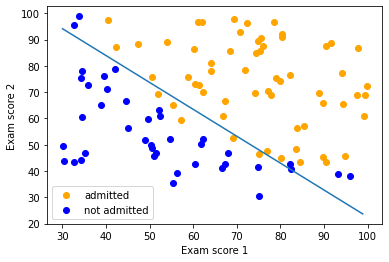

In [18]:
# plot decision bounary
x1 = data[:,[0,1]]
x2 = data[:,-1]

plt.scatter(x = x1[pos,0], y = x1[pos,1], c="orange", label="admitted")
plt.scatter(x = x1[neg,0], y = x1[neg,1], c="blue", label="not admitted")

# plot decision boundary line 
plt.plot(plot_x,plot_y)

plt.xlabel("Exam score 1")
plt.ylabel("Exam score 2")

plt.legend()
plt.show()